In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pandas.core.dtypes.common import is_numeric_dtype
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('global_laptop_selling_data.csv',encoding='ISO-8859-1' )

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  110
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [5]:
df = df.drop('laptop_ID', axis=1)

In [6]:
df.head() # y = df[['Price_euros']]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Preprocessing

In [7]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)

In [8]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 122.3+ KB


In [10]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [11]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [12]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)


Text(0.5, 1.0, 'Average Price Per Company')

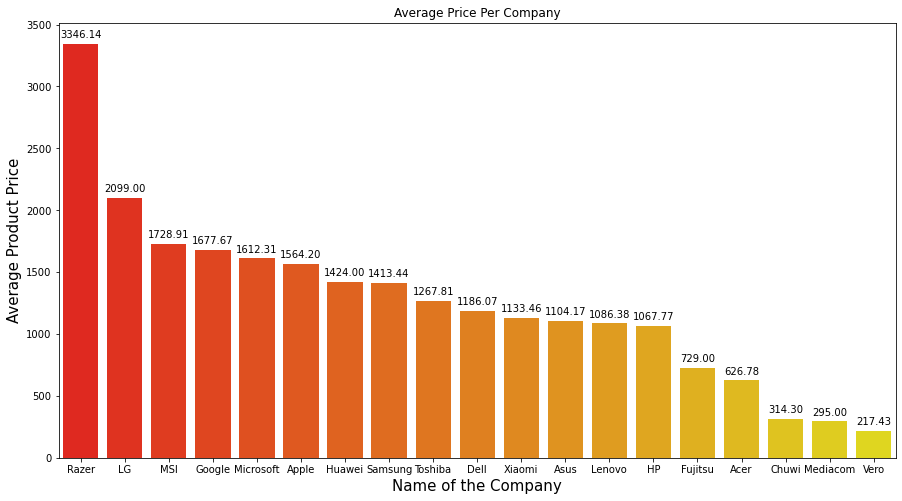

In [13]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

# Keep Continue for Regression Model

# Prediction of the 'price' using regression model

# Split the dataset into X and Y

In [15]:
X=df.drop(df[['Price_euros']],axis=1) 

In [16]:
X.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37


In [17]:
Y=df[['Price_euros']]

In [18]:
Y.head()

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


# Encoding the dataset

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
for col in X.columns:
    if is_numeric_dtype(X[col]):
        continue
    else:
        X[col]=le.fit_transform(X[col])
X.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,300,4,13.3,23,65,8,4,58,8,1.37
1,1,301,4,13.3,1,63,8,2,51,8,1.34
2,7,50,3,15.6,8,74,8,16,53,4,1.86
3,1,300,4,15.4,25,85,16,29,9,8,1.83
4,1,300,4,13.3,23,67,8,16,59,8,1.37


# Divide the Dataset Train = 75%, Test = 25%

In [27]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=.25, random_state=1)

In [28]:
X_train.shape

(977, 11)

In [29]:
X_test.shape

(326, 11)

# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
lereg=LinearRegression()

In [31]:
lereg.fit(X_train,Y_train)

LinearRegression()

In [32]:
LePredict=lereg.predict(X_test)
LePredict

array([[ 541.12400674],
       [1136.37231757],
       [1992.04871573],
       [1213.63096238],
       [1350.70717277],
       [1161.99630282],
       [1161.54756474],
       [ 622.04075676],
       [ 144.69759304],
       [1232.04543803],
       [1236.82020813],
       [1040.64748862],
       [1367.53743187],
       [1486.28678155],
       [1239.10596762],
       [1788.91841811],
       [ 886.33645829],
       [1164.27662015],
       [1060.61891869],
       [ 682.3062702 ],
       [ 914.29754196],
       [ 620.03822531],
       [2018.76038167],
       [1386.68644423],
       [ 645.54407502],
       [1647.24915543],
       [ 632.82627371],
       [1060.47573593],
       [1225.41570507],
       [1371.70340524],
       [2004.6352109 ],
       [ 680.61512281],
       [1151.69371502],
       [1368.10893548],
       [2112.58810312],
       [ 579.09835004],
       [ 689.21263915],
       [ 643.09077184],
       [ 262.08744795],
       [1189.37375746],
       [1044.39314775],
       [ 715.191

In [33]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [34]:
LR_mse=mean_squared_error(Y_test,LePredict)
LR_mae=mean_absolute_error(Y_test,LePredict)
LR_r2=r2_score(Y_test,LePredict)
print("mean_squared_error \"MSE:\"",LR_mse)
print("mean_absolute_error \"MAE:\"",LR_mae)
print("r2_score:",LR_r2)

mean_squared_error "MSE:" 163523.6022031853
mean_absolute_error "MAE:" 287.5183775435752
r2_score: 0.6957201266661295


In [35]:
lereg_training_score=lereg.score(X_train,Y_train)
lereg_training_score

0.6609934163262965

In [36]:
lereg_testing_score=lereg.score(X_test,Y_test)
lereg_testing_score

0.6957201266661295

# KNN Regressor:


In [37]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)

In [38]:
knn.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=3)

In [39]:
knn_pred=knn.predict(X_test)
knn_pred

array([[1530.33333333],
       [ 645.66666667],
       [1259.        ],
       [ 892.66666667],
       [1743.        ],
       [1118.66666667],
       [ 525.99666667],
       [ 995.66666667],
       [ 250.66666667],
       [1571.33333333],
       [1445.66666667],
       [ 954.67      ],
       [2449.        ],
       [1710.        ],
       [1352.66666667],
       [1288.66666667],
       [1109.        ],
       [1380.33333333],
       [1746.63333333],
       [1784.66666667],
       [ 745.33333333],
       [ 725.6       ],
       [1622.        ],
       [1535.66666667],
       [1062.33333333],
       [1250.08      ],
       [ 536.45      ],
       [ 592.33333333],
       [ 595.66666667],
       [ 904.66666667],
       [2775.33      ],
       [ 702.66666667],
       [1292.53333333],
       [1420.66666667],
       [1982.33333333],
       [1162.66666667],
       [ 737.29333333],
       [ 527.        ],
       [ 469.        ],
       [1110.53333333],
       [1193.        ],
       [ 489.333

In [40]:
knn_mse=mean_squared_error(Y_test,knn_pred)
knn_mae=mean_absolute_error(Y_test,knn_pred)
knn_r2=r2_score(Y_test,knn_pred)
print("KNN_mean_squared_error \"MSE:\"",knn_mse)
print("KNN_mean_absolute_error \"MAE:\"",knn_mae)
print("KNN_r2_score:",knn_r2)

KNN_mean_squared_error "MSE:" 117671.34086591683
KNN_mean_absolute_error "MAE:" 231.4996319018405
KNN_r2_score: 0.7810406558362226


In [41]:
knn_training_score=knn.score(X_train,Y_train)
knn_training_score

0.8669109763516925

In [42]:
knn_testing_score=knn.score(X_test,Y_test)
knn_testing_score

0.7810406558362226

# Random Forest Regression

In [43]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()


In [44]:
RFR.fit(X_train,Y_train)

RandomForestRegressor()

In [45]:
RFR_pred=RFR.predict(X_test)

In [46]:
RFR_mse=mean_squared_error(Y_test,RFR_pred)
RFR_mae=mean_absolute_error(Y_test,RFR_pred)
RFR_r2=r2_score(Y_test,RFR_pred)
print("RFR_mean_squared_error \"MSE:\"",RFR_mse)
print("RFR_mean_absolute_error \"MAE:\"",RFR_mae)
print("RFR_r2_score:",RFR_r2)

RFR_mean_squared_error "MSE:" 65467.32894505885
RFR_mean_absolute_error "MAE:" 156.79690609406956
RFR_r2_score: 0.8781803342727408


In [47]:
RFR_training_score=RFR.score(X_train,Y_train)
RFR_training_score

0.9750216670628004

In [48]:
RFR_testing_score=RFR.score(X_test,Y_test)
RFR_testing_score

0.8781803342727408

# Decision Tree Regression

In [49]:
from sklearn.tree import DecisionTreeRegressor

# Build decision tree
dtree=DecisionTreeRegressor(max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=1,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0)
dtree.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0, max_depth=10, random_state=1)

In [50]:
dtree_predict=dtree.predict(X_test)

In [51]:
dtree_mse=mean_squared_error(Y_test,dtree_predict)
dtree_mae=mean_absolute_error(Y_test,dtree_predict)
dtree_r2=r2_score(Y_test,dtree_predict)
print("dtree_mean_squared_error \"MSE:\"",dtree_mse)
print("dtree_mean_absolute_error \"MAE:\"",dtree_mae)
print("dtree_r2_score:",dtree_r2)
dtree_training_score=dtree.score(X_train,Y_train)
print("dtree_training_score: ",dtree_training_score)
dtree_testing_score=dtree.score(X_test,Y_test)
print("dtree_testing_score: ",dtree_testing_score)

dtree_mean_squared_error "MSE:" 160789.40041458837
dtree_mean_absolute_error "MAE:" 215.37830570489058
dtree_r2_score: 0.7008078483325698
dtree_training_score:  0.9588016606047661
dtree_testing_score:  0.7008078483325698


# Support Vector Regression (SVR)

In [52]:
from sklearn.svm import SVR

# Choose regression method and set hyperparameter
svr_lr=SVR(kernel='linear',
    degree=3,
    gamma='scale',
    coef0=0.0,
    tol=0.001,
    C=1.0,
    epsilon=0.1,
    shrinking=True,
    cache_size=200,
    verbose=True,
    max_iter=-1)

# Training of the regression model
svr_lr.fit(X_train, Y_train)
svr_pred = svr_lr.predict(X_test)

[LibSVM]................................*...........*...........................*.................................*...............................................*.................................................................................*....................................................................................................................*.......................................................................*
optimization finished, #iter = 414912
obj = -286459.428053, rho = 256.370048
nSV = 977, nBSV = 967


In [53]:
svr_mse=mean_squared_error(Y_test,svr_pred)
svr_mae=mean_absolute_error(Y_test,svr_pred)
svr_r2=r2_score(Y_test,svr_pred)
print("svr_mean_squared_error \"MSE:\"",svr_mse)
print("svr_mean_absolute_error \"MAE:\"",svr_mae)
print("svr_r2_score:",svr_r2)
svr_training_score=svr_lr.score(X_train,Y_train)
print("svr_training_score: ",svr_training_score)
svr_testing_score=svr_lr.score(X_test,Y_test)
print("svr_testing_score: ",svr_testing_score)

svr_mean_squared_error "MSE:" 168711.49496339276
svr_mean_absolute_error "MAE:" 283.265395686017
svr_r2_score: 0.6860666495492043
svr_training_score:  0.6448599877467633
svr_testing_score:  0.6860666495492043


# Lasso Regression

In [54]:
from sklearn import linear_model

# Fit regression model
lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X_train,Y_train)
# Predict
lassoReg_predict=lassoReg.predict(X_test)

In [55]:
lassoReg_mse=mean_squared_error(Y_test,lassoReg_predict)
lassoReg_mae=mean_absolute_error(Y_test,lassoReg_predict)
lassoReg_r2=r2_score(Y_test,lassoReg_predict)
print("lassoReg_mean_squared_error \"MSE:\"",lassoReg_mse)
print("lassoReg_mean_absolute_error \"MAE:\"",lassoReg_mae)
print("lassoReg_r2_score:",lassoReg_r2)
lassoReg_training_score=lassoReg.score(X_train,Y_train)
print("lassoReg_training_score: ",lassoReg_training_score)
lassoReg_testing_score=lassoReg.score(X_test,Y_test)
print("lassoReg_testing_score: ",lassoReg_testing_score)

lassoReg_mean_squared_error "MSE:" 163553.80876893256
lassoReg_mean_absolute_error "MAE:" 287.53553170242907
lassoReg_r2_score: 0.6956639191836891
lassoReg_training_score:  0.6609929387054483
lassoReg_testing_score:  0.6956639191836891


# AdaBoost Regression

In [56]:
from sklearn.ensemble import AdaBoostRegressor

adaBoost=AdaBoostRegressor(n_estimators=13,
    learning_rate=1.0,
    loss='linear',
    random_state=1)

In [58]:
adaBoost.fit(X_train,Y_train)
# Predict
adaBoost_predict=adaBoost.predict(X_test)

In [59]:
adaBoost_mse=mean_squared_error(Y_test,adaBoost_predict)
adaBoost_mae=mean_absolute_error(Y_test,adaBoost_predict)
adaBoost_r2=r2_score(Y_test,adaBoost_predict)
print("adaBoost_mean_squared_error \"MSE:\"",adaBoost_mse)
print("adaBoost_mean_absolute_error \"MAE:\"",adaBoost_mae)
print("adaBoost_r2_score:",adaBoost_r2)
adaBoost_training_score=adaBoost.score(X_train,Y_train)
print("adaBoost_training_score: ",adaBoost_training_score)
adaBoost_testing_score=adaBoost.score(X_test,Y_test)
print("adaBoost_testing_score: ",adaBoost_testing_score)

adaBoost_mean_squared_error "MSE:" 147055.91427457295
adaBoost_mean_absolute_error "MAE:" 295.90459932935505
adaBoost_r2_score: 0.7263627123816383
adaBoost_training_score:  0.7222324198239789
adaBoost_testing_score:  0.7263627123816383


## XGBoost Regression

In [60]:
import xgboost as xg

xgb = xg.XGBRegressor(n_estimators=14,max_depth=14)

In [61]:
xgb.fit(X_train,Y_train)
xgb_predict=xgb.predict(X_test)

In [62]:
xgb_mse=mean_squared_error(Y_test,xgb_predict)
xgb_mae=mean_absolute_error(Y_test,xgb_predict)
xgb_r2=r2_score(Y_test,xgb_predict)
print("xgb_mean_squared_error \"MSE:\"",xgb_mse)
print("xgb_mean_absolute_error \"MAE:\"",xgb_mae)
print("xgb_r2_score:",xgb_r2)
xgb_training_score=xgb.score(X_train,Y_train)
print("xgb_training_score: ",xgb_training_score)
xgb_testing_score=xgb.score(X_test,Y_test)
print("xgb_testing_score: ",xgb_testing_score)

xgb_mean_squared_error "MSE:" 63491.45330542175
xgb_mean_absolute_error "MAE:" 155.46258565703783
xgb_r2_score: 0.8818569851124478
xgb_training_score:  0.9946158105345613
xgb_testing_score:  0.8818569851124478


## Gradient Boost Regression
- Find out ccalpha value for good accurecy

In [63]:
train_score=dict() # take Blank Dictionary
test_score=dict() # take Blank Dictionary
ccalpha=range(300) # check value for range 0-300
from sklearn.ensemble import GradientBoostingRegressor
for i in ccalpha:
    gBoost=GradientBoostingRegressor(loss='squared_error',
        learning_rate=0.1, n_estimators=100, subsample=1.0,
        criterion='friedman_mse', min_samples_split=2,
        min_samples_leaf=1, min_weight_fraction_leaf=0.0,
        max_depth=14, min_impurity_decrease=0.0, init=None,
        random_state=None, max_features=None,
        alpha=0.9, verbose=0, max_leaf_nodes=None,
        warm_start=False, validation_fraction=0.1,
        n_iter_no_change=None, tol=0.0001, ccp_alpha=i)
    gBoost.fit(X_train,Y_train)
    gBoost_predict=gBoost.predict(X_test)

    gBoost_training_score=gBoost.score(X_train,Y_train)
    train_score[i]=gBoost_training_score # add new item into dictionary
    gBoost_testing_score=gBoost.score(X_test,Y_test)
    test_score[i]=gBoost_testing_score # add new item into dictionary
    
max_train_score = max(train_score, key=train_score.get) # find  max key from dictionary for ccalpha
max_test_score = max(test_score, key=test_score.get) # find  max key from dictionary for ccalpha
print("train_score",max_train_score)
print("test_score",max_test_score)

train_score 0
test_score 261


In [64]:
gBoost=GradientBoostingRegressor(ccp_alpha=max_test_score,random_state=max_test_score)
gBoost.fit(X_train,Y_train)
gBoost_predict=gBoost.predict(X_test)

gBoost_mse=mean_squared_error(Y_test,gBoost_predict)
gBoost_mae=mean_absolute_error(Y_test,gBoost_predict)
gBoost_r2=r2_score(Y_test,gBoost_predict)
print("gBoost_mean_squared_error \"MSE:\"",gBoost_mse)
print("gBoost_mean_absolute_error \"MAE:\"",gBoost_mae)
print("gBoost_r2_score:",gBoost_r2)
gBoost_training_score=gBoost.score(X_train,Y_train)
print("gBoost_training_score: ",gBoost_training_score)
gBoost_testing_score=gBoost.score(X_test,Y_test)
print("gBoost_testing_score: ",gBoost_testing_score)

gBoost_mean_squared_error "MSE:" 72446.60470542798
gBoost_mean_absolute_error "MAE:" 180.3050345225549
gBoost_r2_score: 0.8651935047526295
gBoost_training_score:  0.900821588698134
gBoost_testing_score:  0.8651935047526295


# Gaussian Process Regression

In [65]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gaussianReg = GaussianProcessRegressor(kernel=kernel,normalize_y=True,random_state=1)
gaussianReg.fit(X_train, Y_train)
#gaussianReg.kernel_

GaussianProcessRegressor(kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         normalize_y=True, random_state=1)

In [66]:
gaussianReg_predict=gaussianReg.predict(X_test)

In [67]:
gaussianReg_mse=mean_squared_error(Y_test,gaussianReg_predict)
gaussianReg_mae=mean_absolute_error(Y_test,gaussianReg_predict)
gaussianReg_r2=r2_score(Y_test,gaussianReg_predict)
print("gaussianReg_mean_squared_error \"MSE:\"",gaussianReg_mse)
print("gaussianReg_mean_absolute_error \"MAE:\"",gaussianReg_mae)
print("gaussianReg_r2_score:",gaussianReg_r2)
gaussianReg_training_score=gaussianReg.score(X_train,Y_train)
print("gaussianReg_training_score: ",gaussianReg_training_score)
gaussianReg_testing_score=gaussianReg.score(X_test,Y_test)
print("gaussianReg_testing_score: ",gaussianReg_testing_score)

gaussianReg_mean_squared_error "MSE:" 163627.10688097152
gaussianReg_mean_absolute_error "MAE:" 287.2903472807887
gaussianReg_r2_score: 0.6955275282288279
gaussianReg_training_score:  0.660980949520455
gaussianReg_testing_score:  0.6955275282288279


In [68]:
LR_DF = pd.DataFrame({'Algorithm Name': ['LREG r2 score:','KNN r2 score:','RandomForest_r2_score:','DecisionTree_r2_score',
                                         'SVR_r2_score','LassoRegression_r2_score','AdaBoost_r2_score','XGBoost_r2_score',
                                         'GradientBoost_r2_score','GaussianReg_r2_score'],
                      'Accuracy Score %': [LR_r2*100,knn_r2*100,
                                          RFR_r2*100,dtree_r2*100,
                                          svr_r2*100,lassoReg_r2*100,
                                          adaBoost_r2*100,xgb_r2*100,
                                          gBoost_r2*100,
                                          gaussianReg_r2*100]})
LR_DF

,Algorithm Name,Accuracy Score %
0,LREG r2 score:,69.572013
1,KNN r2 score:,78.104066
2,RandomForest_r2_score:,87.818033
3,DecisionTree_r2_score,70.080785
4,SVR_r2_score,68.606665
5,LassoRegression_r2_score,69.566392
6,AdaBoost_r2_score,72.636271
7,XGBoost_r2_score,88.185699
8,GradientBoost_r2_score,86.519350
9,GaussianReg_r2_score,69.552753


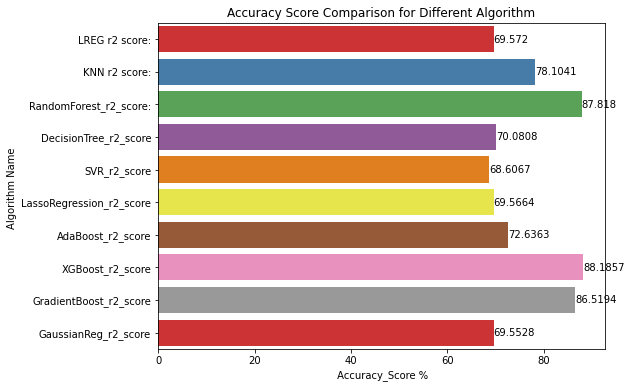

In [69]:
plt.figure(figsize = (8, 6))
ax=sns.barplot(y='Algorithm Name',x='Accuracy Score %',data=LR_DF,palette='Set1')
#sns.set(rc = {'figure.figsize':(20, 20)})

ax.set_xlabel( " Accuracy_Score %")
ax.set_ylabel( "Algorithm Name ")
ax.set_title(  "Accuracy Score Comparison for Different Algorithm")
ax.bar_label(ax.containers[0])  # show value
plt.show()

#### NB: Random Forest, XGBoost and Gradient Boost Regression Algorithm are giving good accuracy for this Dataset respectively.